# Advanced NLP Chatbot Implementation

This notebook creates an enhanced chatbot that uses NLP techniques to understand and respond to user inputs. It leverages TF-IDF vectorization and a machine learning model to identify user intents and provide appropriate responses.

## 1. Import Required Libraries

In [28]:
import json
import nltk
import numpy as np
import pandas as pd
import random
import re
import ssl
import string
import warnings
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

## 2. Download NLTK Resources

In [29]:
# Handle SSL certificate issues
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download required NLTK datasets
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## 3. Load and Examine Intents Data

In [30]:
# Load intents from file
# You can use this cell to load the intents.json file
# Or paste the intents directly as shown below

# Option 1: Load from file
with open('/content/intents.json', 'r') as f:
    intents = json.load(f)

# Option 2: Define intents directly in code (abbreviated for brevity)
# This is just a small sample - use the full intents.json in practice
# intents = [
#     {
#         'tag': 'greeting',
#         'patterns': ['Hi', 'Hello', 'Hey', 'Whats up', 'How are you'],
#         'responses': ['Hi there', 'Hello', 'Hey', 'Nothing much', 'I\'m fine, thank you']
#     },
#     {
#         'tag': 'goodbye',
#         'patterns': ['Bye', 'See you later', 'Goodbye', 'Take care'],
#         'responses': ['Goodbye', 'See you later', 'Take care']
#     },
#     {
#         "tag": "thanks",
#         "patterns": ["Thank you", "Thanks", "Thanks a lot", "I appreciate it"],
#         "responses": ["You're welcome", "No problem", "Glad I could help"]
#     },
#     {
#         "tag": "about",
#         "patterns": ["What can you do", "Who are you", "What are you", "What is your purpose"],
#         "responses": ["I am a chatbot", "My purpose is to assist you", "I can answer questions and provide assistance"]
#     }
#     # ... add more intents or load from json file
# ]

# Display some statistics about the intents
print(f"Number of intents: {len(intents)}")
total_patterns = sum(len(intent['patterns']) for intent in intents)
print(f"Total number of patterns: {total_patterns}")
total_responses = sum(len(intent['responses']) for intent in intents)
print(f"Total number of responses: {total_responses}")

Number of intents: 278
Total number of patterns: 835
Total number of responses: 567


## 4. Preprocess the Text Data

In [31]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
import nltk
nltk.download('punkt_tab')
def preprocess_text(text):
    """
    Preprocess text by:
    1. Converting to lowercase
    2. Removing punctuation
    3. Tokenizing
    4. Removing stopwords
    5. Lemmatizing
    """
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize
    return ' '.join(tokens)

# Create lists for patterns and tags
patterns = []
tags = []
for intent in intents:
    for pattern in intent['patterns']:
        # Preprocess each pattern
        processed_pattern = preprocess_text(pattern)
        patterns.append(processed_pattern)
        tags.append(intent['tag'])

# Convert to DataFrame for easier handling
data = pd.DataFrame({'pattern': patterns, 'tag': tags})
display(data.head())
print(f"Shape of data: {data.shape}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,pattern,tag
0,hi,greeting
1,hello,greeting
2,hey,greeting
3,,greeting
4,whats,greeting


Shape of data: (835, 2)


## 5. Analyze Data Distribution

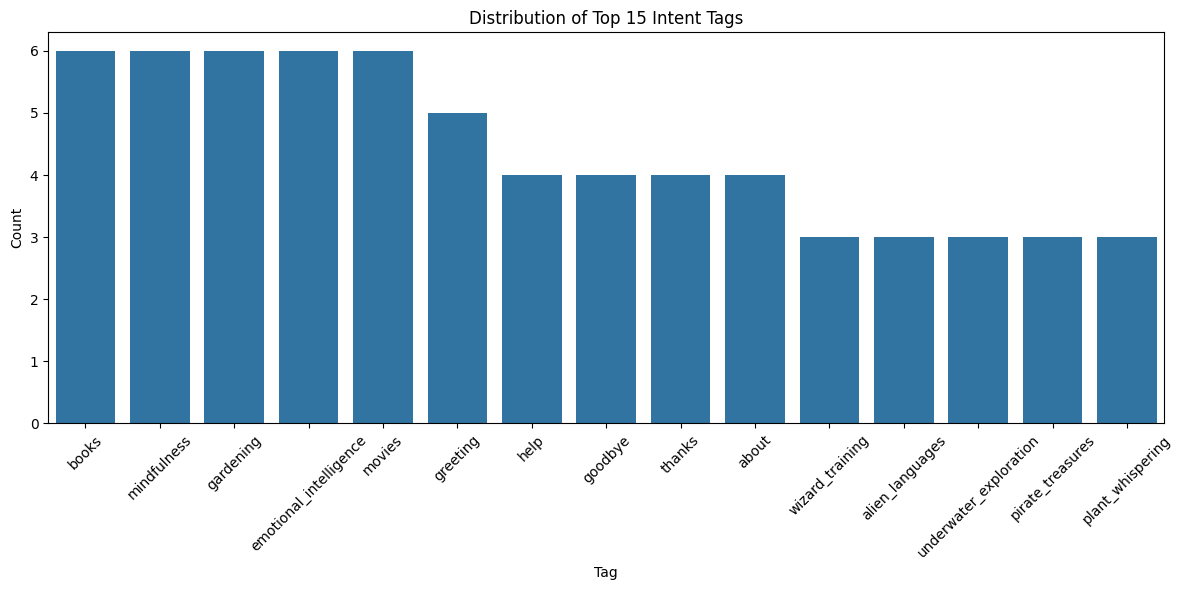

In [32]:
# Visualize the distribution of tags
plt.figure(figsize=(12, 6))
tag_counts = data['tag'].value_counts()
sns.barplot(x=tag_counts.index[:15], y=tag_counts.values[:15])  # Top 15 tags
plt.title('Distribution of Top 15 Intent Tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Create Feature Extraction Pipeline and Train the Model

In [33]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['pattern'], data['tag'], test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Random Forest classifier
# Using Random Forest for better generalization
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = clf.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.2275

Classification Report:
                                precision    recall  f1-score   support

                         about       0.00      0.00      0.00         0
                alien_invasion       0.00      0.00      0.00         2
               alien_languages       0.00      0.00      0.00         0
                arcane_alchemy       0.00      0.00      0.00         2
                           art       0.00      0.00      0.00         1
                art_and_crafts       0.00      0.00      0.00         2
  artificial_superintelligence       0.00      0.00      0.00         1
        biomedical_engineering       0.50      1.00      0.67         1
                         books       0.67      1.00      0.80         2
      brain_computer_interface       1.00      1.00      1.00         1
                budgeting_tips       0.00      0.00      0.00         1
               car_maintenance       0.00      0.00      0.00         1
                      

## 7. Create the Chatbot Function

In [34]:
def get_response(user_input):
    """
    Process user input and return an appropriate response based on the
    predicted intent.
    """
    # Preprocess the input
    processed_input = preprocess_text(user_input)

    # If the input is empty after preprocessing
    if not processed_input:
        return "I didn't catch that. Could you please rephrase?"

    # Transform the input using the vectorizer
    input_tfidf = vectorizer.transform([processed_input])

    # Get prediction probabilities
    probabilities = clf.predict_proba(input_tfidf)[0]
    max_prob = max(probabilities)

    # If confidence is too low, return a default response
    if max_prob < 0.3:  # Confidence threshold
        return "I'm not sure I understand. Could you elaborate?"

    # Predict the tag
    predicted_tag = clf.predict(input_tfidf)[0]

    # Find responses for the predicted tag
    for intent in intents:
        if intent['tag'] == predicted_tag:
            return random.choice(intent['responses'])

    # Fallback response if no matching intent is found
    return "I'm still learning. Could you try asking differently?"

## 8. Interactive Chat Interface

In [35]:
def chat():
    print("Chatbot: Hi there! I'm your AI assistant. Type 'quit' to exit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() in ['quit', 'exit', 'bye']:
            print("Chatbot: Goodbye! Have a great day!")
            break
        response = get_response(user_input)
        print(f"Chatbot: {response}")

In [36]:
# Start the chat
chat()

Chatbot: Hi there! I'm your AI assistant. Type 'quit' to exit.
You: Hello
Chatbot: Hey
You: I am Vaibhav
Chatbot: My purpose is to assist you
You: what is ai
Chatbot: Artificial intelligence is the simulation of human intelligence in machines, enabling them to learn and perform tasks.
You: what is ml
Chatbot: Machine learning is a subset of AI that enables systems to learn from data and improve performance over time.
You: great
Chatbot: I can answer questions and provide assistance
You: what is the time
Chatbot: You can check the time on your device or use a clock.
You: what is nlp
Chatbot: I can answer questions and provide assistance
You: quit
Chatbot: Goodbye! Have a great day!


## 9. Test with Specific Examples

In [37]:
test_queries = [
    "Hello there!",
    "What's your name?",
    "Tell me a joke",
    "How can I make a budget?",
    "What's emotional intelligence?",
    "Tell me about time travel",
    "I need some motivation",
    "Thank you for your help",
    "Goodbye"
]

print("Testing with specific examples:\n")
for query in test_queries:
    response = get_response(query)
    print(f"User: {query}")
    print(f"Chatbot: {response}\n")

Testing with specific examples:

User: Hello there!
Chatbot: I'm fine, thank you

User: What's your name?
Chatbot: My name is Chatbot.

User: Tell me a joke
Chatbot: Why don't skeletons fight each other? They don't have the guts!

User: How can I make a budget?
Chatbot: To make a budget, start by tracking your income and expenses. Then, allocate your income towards essential expenses like rent, food, and bills. Next, allocate some of your income towards savings and debt repayment. Finally, allocate the remainder of your income towards discretionary expenses like entertainment and hobbies.

User: What's emotional intelligence?
Chatbot: Developing emotional intelligence involves self-awareness, empathy, effective communication, and emotional regulation.

User: Tell me about time travel
Chatbot: I'm not sure I understand. Could you elaborate?

User: I need some motivation
Chatbot: Obstacles are stepping stones to success. Embrace challenges as opportunities for growth and learning.

User:

## 10. Advanced Feature: Sentiment Analysis

In [38]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    """
    Analyze the sentiment of text and return a label (positive, negative, neutral).
    """
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return "positive"
    elif compound_score <= -0.05:
        return "negative"
    else:
        return "neutral"

def enhanced_response(user_input):
    """
    Get response and enhance it with sentiment awareness.
    """
    sentiment = analyze_sentiment(user_input)
    response = get_response(user_input)

    # Add sentiment-based modifications
    if sentiment == "negative":
        empathy_phrases = [
            "I understand you might be feeling frustrated. ",
            "I'm sorry to hear that. ",
            "That sounds challenging. "
        ]
        response = random.choice(empathy_phrases) + response

    return response, sentiment

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [39]:
# Test sentiment analysis with some examples
test_with_sentiment = [
    "I'm really happy today!",
    "This is frustrating and annoying.",
    "I don't know what to do anymore.",
    "The weather is quite nice."
]

print("Testing with sentiment analysis:\n")
for query in test_with_sentiment:
    response, sentiment = enhanced_response(query)
    print(f"User: {query}")
    print(f"Sentiment: {sentiment}")
    print(f"Chatbot: {response}\n")

Testing with sentiment analysis:

User: I'm really happy today!
Sentiment: positive
Chatbot: My purpose is to assist you

User: This is frustrating and annoying.
Sentiment: negative
Chatbot: I'm sorry to hear that. I can answer questions and provide assistance

User: I don't know what to do anymore.
Sentiment: neutral
Chatbot: I am a chatbot

User: The weather is quite nice.
Sentiment: positive
Chatbot: I can answer questions and provide assistance



## 11. Enhanced Interactive Chat with Sentiment Analysis

In [40]:
def enhanced_chat():
    print("Chatbot: Hi there! I'm your AI assistant. Type 'quit' to exit.")
    conversation_history = []

    while True:
        user_input = input("You: ")
        if user_input.lower() in ['quit', 'exit', 'bye']:
            print("Chatbot: Goodbye! Have a great day!")
            break

        # Store user input
        conversation_history.append({"role": "user", "message": user_input})

        # Get enhanced response with sentiment
        response, sentiment = enhanced_response(user_input)
        print(f"Chatbot: {response}")

        # Store bot response
        conversation_history.append({"role": "bot", "message": response, "sentiment": sentiment})

    # Return conversation history for potential further analysis
    return conversation_history

In [41]:
# Start the enhanced chat
conversation = enhanced_chat()

Chatbot: Hi there! I'm your AI assistant. Type 'quit' to exit.
You: Hey
Chatbot: I can answer questions and provide assistance
You: name
Chatbot: You can call me Chatbot.
You: time
Chatbot: I'm sorry, but I don't have access to real-time information like the current time.
You: how are you
Chatbot: I didn't catch that. Could you please rephrase?
You: what is ai?
Chatbot: AI has diverse applications, including voice assistants, self-driving cars, recommendation systems, and medical diagnostics.
You: ok good
Chatbot: My purpose is to assist you
You: quit
Chatbot: Goodbye! Have a great day!


## 12. Save the Trained Model

In [42]:
import pickle

# Save the vectorizer and classifier
with open('chatbot_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('chatbot_classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)

print("Model saved successfully!")

Model saved successfully!


## 13. Load the Model (for future use)

In [43]:
# Example code to load the saved model
def load_model():
    with open('chatbot_vectorizer.pkl', 'rb') as f:
        loaded_vectorizer = pickle.load(f)

    with open('chatbot_classifier.pkl', 'rb') as f:
        loaded_classifier = pickle.load(f)

    return loaded_vectorizer, loaded_classifier

# Uncomment to load the model
# loaded_vectorizer, loaded_classifier = load_model()

## 14. Conclusion

This notebook implements an enhanced chatbot that:
- Uses NLP techniques for text preprocessing
- Employs TF-IDF vectorization for feature extraction
- Utilizes a Random Forest classifier for intent prediction
- Incorporates sentiment analysis for more empathetic responses
- Provides a simple interactive interface for chatting

The chatbot can be further improved by:
- Adding more intents and patterns
- Using more advanced models like neural networks
- Incorporating context tracking for multi-turn conversations
- Adding spelling correction and entity recognition
- Implementing fallback strategies for low-confidence predictions